Accuracy: 1.0


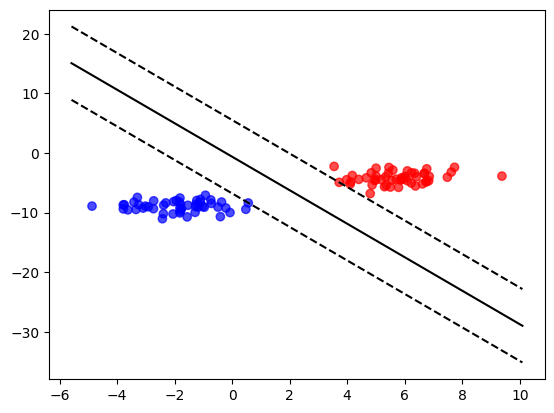

In [1]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param  # regularization strength
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Ensure labels are -1 and +1
        y_ = np.where(y <= 0, -1, 1)

        # Initialize weights
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    # Only regularization term
                    dw = 2 * self.lambda_param * self.w
                    db = 0
                else:
                    # Regularization + hinge loss gradient
                    dw = 2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    db = -y_[idx]

                # Update weights
                self.w -= self.lr * dw
                self.b -= self.lr * db

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)
    

# ----------------------------
# Example Run
# ----------------------------
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt

    # Generate toy dataset (2 classes)
    X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40)
    y = np.where(y == 0, -1, 1)  # Convert to -1, 1

    # Train SVM
    clf = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
    clf.fit(X, y)
    predictions = clf.predict(X)

    acc = np.sum(predictions == y) / len(y)
    print("Accuracy:", acc)

    # Plot decision boundary
    def plot_svm(clf, X, y):
        def hyperplane(x, w, b, offset):
            return (-w[0] * x - b + offset) / w[1]

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)

        ax = plt.gca()
        x0 = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 200)

        # Decision boundary
        decision_boundary = hyperplane(x0, clf.w, clf.b, 0)
        margin_up = hyperplane(x0, clf.w, clf.b, 1)
        margin_down = hyperplane(x0, clf.w, clf.b, -1)

        plt.plot(x0, decision_boundary, "k-")
        plt.plot(x0, margin_up, "k--")
        plt.plot(x0, margin_down, "k--")
        plt.show()

    plot_svm(clf, X, y)
